In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [6]:
drops_cols_train = train_data[["Surname", "id", "CustomerId"]]
train_data = train_data.drop(drops_cols_train.columns, axis=1)

In [7]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [8]:
train_data["Geography"] = train_data["Geography"].astype('category')
train_data["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [9]:
train_data["Gender"] = train_data["Gender"].astype('category')
train_data["Gender"].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   CreditScore      165034 non-null  int64   
 1   Geography        165034 non-null  category
 2   Gender           165034 non-null  category
 3   Age              165034 non-null  float64 
 4   Tenure           165034 non-null  int64   
 5   Balance          165034 non-null  float64 
 6   NumOfProducts    165034 non-null  int64   
 7   HasCrCard        165034 non-null  float64 
 8   IsActiveMember   165034 non-null  float64 
 9   EstimatedSalary  165034 non-null  float64 
 10  Exited           165034 non-null  int64   
dtypes: category(2), float64(5), int64(4)
memory usage: 11.6 MB


In [19]:
# Check for missing values
train_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
# Check for duplicates
drops_cols_train.duplicated().sum()

0

In [38]:
# Creating dummy variables to convert categorical data to numerical
train_data_dummy = pd.get_dummies(train_data, drop_first=False, dtype=int)
train_data_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1,0,1


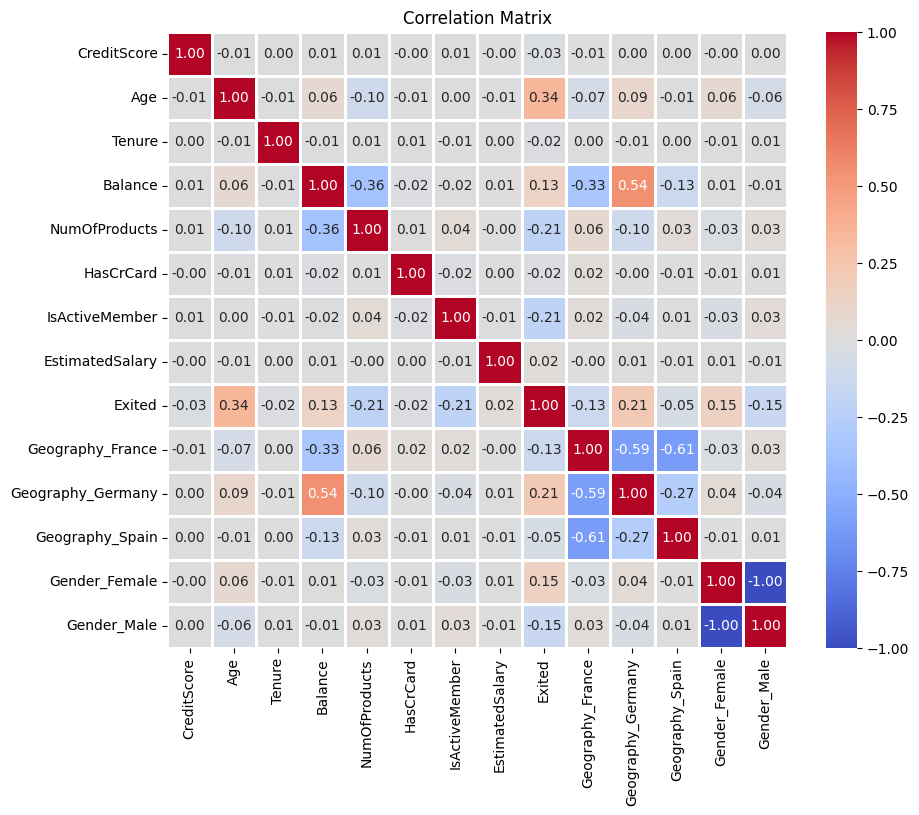

In [39]:
# Plot Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train_data_dummy.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()